In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [29]:
# Define constants
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
EPOCHS = 10

In [30]:
# Define data generators
train_data = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_data.flow_from_directory(
    directory='/content/drive/MyDrive/Hands-on/indoor-outdoor-mlp/dataset/Photographs/train',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

validation_generator = train_data.flow_from_directory(
    directory='/content/drive/MyDrive/Hands-on/indoor-outdoor-mlp/dataset/Photographs/validation',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 320 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [31]:
# Define the model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [32]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

Epoch 1/10
10/10 [==============================] - 55s 5s/step - loss: 1.2114 - accuracy: 0.5906 - val_loss: 0.5968 - val_accuracy: 0.8000
Epoch 2/10
10/10 [==============================] - 51s 5s/step - loss: 0.4852 - accuracy: 0.8125 - val_loss: 0.2443 - val_accuracy: 0.8000
Epoch 3/10
10/10 [==============================] - 51s 5s/step - loss: 0.2835 - accuracy: 0.8969 - val_loss: 0.3904 - val_accuracy: 0.8000
Epoch 4/10
10/10 [==============================] - 50s 5s/step - loss: 0.2625 - accuracy: 0.8969 - val_loss: 0.1643 - val_accuracy: 0.9000
Epoch 5/10
10/10 [==============================] - 57s 6s/step - loss: 0.3027 - accuracy: 0.8719 - val_loss: 0.2303 - val_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 49s 5s/step - loss: 0.2250 - accuracy: 0.9094 - val_loss: 0.3246 - val_accuracy: 0.8000
Epoch 7/10
10/10 [==============================] - 50s 5s/step - loss: 0.3135 - accuracy: 0.8594 - val_loss: 0.3903 - val_accuracy: 0.8000
Epoch 8/10
10/10 [==

In [33]:
# Evaluate the model on the train and test data
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc = model.evaluate(validation_generator)

# Print the train and test accuracy
print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)

1/1 [==============================] - 1s 1s/step - loss: 0.2178 - accuracy: 0.9000
Train accuracy: 0.893750011920929
Test accuracy: 0.8999999761581421


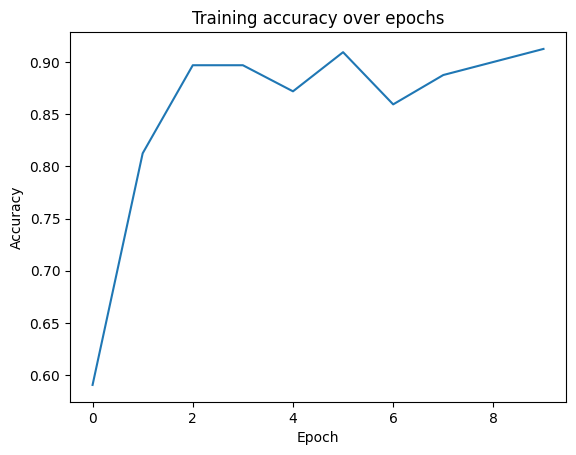

In [34]:
import matplotlib.pyplot as plt

# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

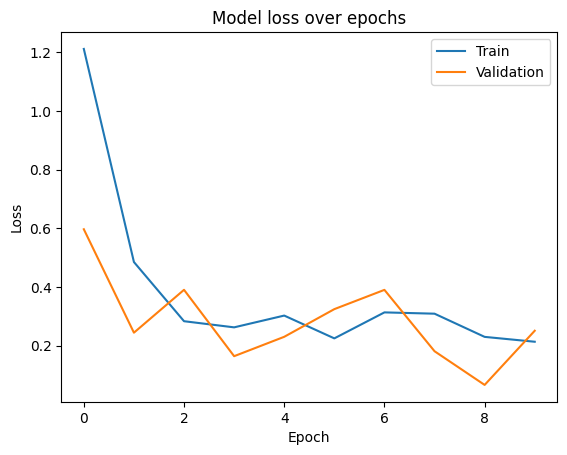

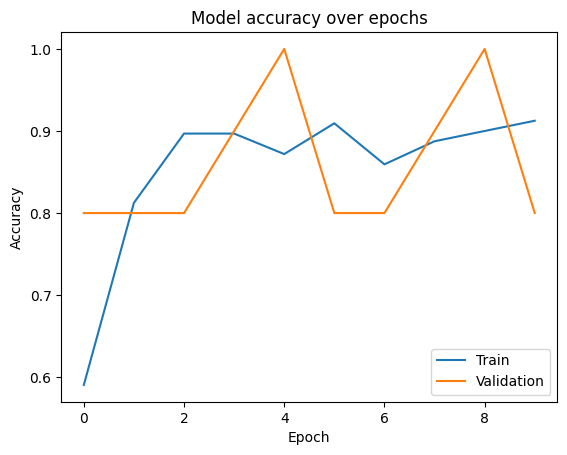

In [35]:
import matplotlib.pyplot as plt

# Plot the training and validation loss and accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


In [37]:
# Save the model
model.save('/content/drive/MyDrive/Hands-on/indoor-outdoor-mlp/binary_image_classifier.h5')